In [1]:
# <!-- collapse=True -->
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import calendar
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
under_sample=pd.read_csv("data/under_sample.csv")

In [34]:
testSet=pd.read_csv("data/testSet.csv")
print testSet.shape
testSet.head()

(19415, 56)


,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0


In [39]:
testSetValues=testSet.iloc[:,:].drop(columns = "person").values
testSetValues

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 3., 3.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 6., 5., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [4]:
print under_sample.shape
under_sample.head()

(1960, 57)


,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
0,003476c0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,003bdb4d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,003d4cac,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,003dd965,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
4,0042421c,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
#PREPARAMOS EL DATASET PARA REALIZAR LAS PRUEBAS
y = under_sample["label"].values
X = under_sample.iloc[:,:-1].drop(columns = "person").values
#Spliteo con shuffle=False es decir ordenado
X_train, X_test, y_train, y_test =\
train_test_split(X,y,test_size = 0.2,shuffle = False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1568L, 55L)
(1568L,)
(392L, 55L)
(392L,)


In [6]:
# CREAMOS EL CLASIFICADOR Y FITEAMOS EL MISMO.
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
#VERIFICAMOS EL SCORE
knn.score(X_test, y_test)

0.6913265306122449

In [8]:
#VAMOS A CREAR UN NUEVO MODELO Y REALIZAR CV CON K=5
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.70408163 0.69642857 0.70663265 0.68112245 0.70153061]
cv_scores mean:0.697959183673


In [18]:
#CREAMOS UN NUEVO MODELO Y GENERAMOS LOS PARAMETROS A TESTEAR
knn2 = KNeighborsClassifier(weights='distance')
k_range=np.arange(1, 100)
param_grid = {'n_neighbors': k_range}

knn_gscv=GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc', return_train_score=False)
knn_gscv.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=0)

In [19]:
#VERIFICAMOS EL PARAMETRO CON MEJOR PERFORMANCE
knn_gscv.best_params_

{'n_neighbors': 40}

In [20]:
#VERIFICAMOS LA MEJOR PERFORMANCE
knn_gscv.best_score_

0.8157590587255309

In [21]:
#OBSERVAMOS LAS MISMAS
pd.DataFrame(knn_gscv.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.671429,0.034619,{u'n_neighbors': 1}
1,0.728254,0.028686,{u'n_neighbors': 2}
2,0.757039,0.033429,{u'n_neighbors': 3}
3,0.763515,0.034450,{u'n_neighbors': 4}
4,0.777473,0.032380,{u'n_neighbors': 5}
5,0.785230,0.036992,{u'n_neighbors': 6}
6,0.790775,0.034276,{u'n_neighbors': 7}
7,0.792264,0.031702,{u'n_neighbors': 8}
8,0.793669,0.034699,{u'n_neighbors': 9}
9,0.795523,0.040116,{u'n_neighbors': 10}


In [22]:
# OBSERVAMOS EL PRIMER RESULTADO, K=1
print(knn_gscv.cv_results_['params'][0])
print(knn_gscv.cv_results_['mean_test_score'][0])



{'n_neighbors': 1}
0.6714285714285714


In [23]:
# IMPRIMO POR PANTALLA LOS MEJORES RESULTADOS.
grid_mean_scores = knn_gscv.cv_results_['mean_test_score']
print(grid_mean_scores)



[0.67142857 0.72825385 0.75703873 0.7635152  0.77747293 0.78523011
 0.79077468 0.79226364 0.7936693  0.7955227  0.79767805 0.79942212
 0.80280092 0.80541441 0.8047272  0.80512287 0.80644002 0.80714286
 0.80750208 0.80942836 0.81002187 0.81071949 0.81012599 0.80874115
 0.81065181 0.81180758 0.81035506 0.81071429 0.81108392 0.81164098
 0.81237505 0.81163578 0.81166181 0.81386922 0.81442107 0.81425448
 0.8149469  0.81415035 0.81548834 0.81575906 0.81543628 0.81407226
 0.81327051 0.81464494 0.81499375 0.81360891 0.81455123 0.81285923
 0.81375989 0.81359329 0.81293211 0.81302062 0.8128384  0.81181279
 0.81116722 0.81118805 0.81045398 0.8113182  0.81190129 0.80983965
 0.80987609 0.80977197 0.81006352 0.80968867 0.81121928 0.81077676
 0.81079758 0.81101104 0.81188567 0.81246876 0.81065702 0.8102197
 0.81000104 0.80837151 0.80876718 0.80748126 0.8084444  0.80896501
 0.80783007 0.80792378 0.80784569 0.80604956 0.80733549 0.80673678
 0.80834548 0.80812682 0.80790296 0.80777801 0.80751249 0.80750

[]

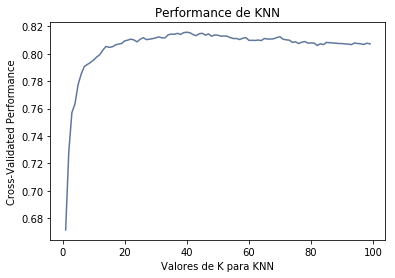

In [24]:
# GRAFICAMOS LA PERFORMANCE
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Valores de K para KNN')
plt.ylabel('Cross-Validated Performance')
plt.title('Performance de KNN')
plt.plot()

In [30]:
knn_40 = KNeighborsClassifier(n_neighbors=40,weights='distance')
knn_40.fit(X_train,y_train)
knn_40

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='distance')

In [40]:
proba_test=knn_40.predict_proba(testSetValues)

In [45]:
proba_test=proba_test[:,1]
proba_test

array([0.50078503, 0.5       , 0.30843745, ..., 0.57142857, 0.61653354,
       0.13636364])

In [46]:
df_test=pd.DataFrame({'person':testSet['person']})
df_test.head()

,person
0,00091926
1,00091a7a
2,000ba417
3,000e4d9e
4,000e619d


In [47]:
df_test['label']=proba_test
df_test.head()

,person,label
0,00091926,0.500785
1,00091a7a,0.500000
2,000ba417,0.308437
3,000e4d9e,0.590223
4,000e619d,0.406033


In [48]:
df_test.to_csv('knn_40.csv',index=False)